<a href="https://colab.research.google.com/github/SireeshaM6/Advanced_House_Dataset/blob/main/ANN_MNIST_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
# Taking MNIST dataset from Keras of 10 digits with Multicalss . These are Grayscale images.
mnist = tf.keras.datasets.mnist

In [ ]:
# By default it has the training and test data

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
# Checking the shape of the training data, it should be like  --- No of images * height * width. It doesn't have color as of now.
# The Images are stored in the form pixels from 0 to 255; 0 = Black, 1=White
# Type of the X_train  === ndarray;
# To check on first image ==== x_train[0].shape ---- It has 28 rows and 28 columns.
# Y_train has actual values and X_train and X_test stores the images in the form of pixels.
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
y_train[0]

5

In [ ]:
y_train.shape

(60000,)

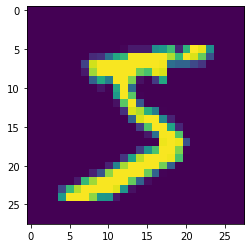

In [ ]:
# To see the images in the form of heatmap.

plt.imshow(x_train[0])
plt.show()

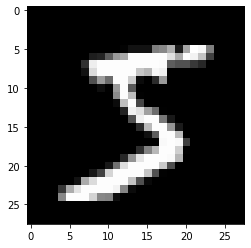

In [ ]:
# To show the images in the Grayscale (It has black,white and gary colors in the image)

plt.imshow(x_train[0],cmap='gray')
plt.show()

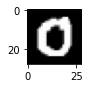

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[5321],cmap='gray')
plt.show()

In [ ]:
# To verify the above image, we can check from the y_train
y_train[5321]

0

In [ ]:
# Since we can't pass the large values (0-255) to Neural Network, we need to scale. We can do scaling in different ways by centering the values to 0 to 1.
# Now, the x values are between 0 to 1.

x_train,x_test = x_train/255.0, x_test/255.0

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

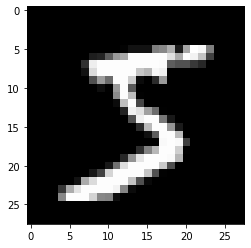

In [ ]:
plt.imshow(x_train[0],cmap='gray')
plt.show()

**Building the Model --- Artificial Neural Network**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2), # To overcome the Over fitting problem
    tf.keras.layers.Dense(10,activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# We are using loss function as Sparse Categorical Crossentropy because the images has mostly black color (0) .

In [ ]:
# Go and Study the model

fitted_model = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3012 - accuracy: 0.9126 - val_loss: 0.1428 - val_accuracy: 0.9574
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1447 - accuracy: 0.9573 - val_loss: 0.1065 - val_accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1088 - accuracy: 0.9675 - val_loss: 0.0854 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0898 - accuracy: 0.9725 - val_loss: 0.0729 - val_accuracy: 0.9781
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0754 - accuracy: 0.9774 - val_loss: 0.0763 - val_accuracy: 0.9766
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0668 - accuracy: 0.9790 - val_loss: 0.0730 - val_accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0600 - accuracy: 0.9810 - val_loss: 0.0719 - val_accurac

In [ ]:
int(60000/1875)

# 32
# that means the default batch_size=32
# i.e. by default, it is processing 32 images at a time

# Therefore, there are total 1875 batches, each batch comprising of 32 images

32

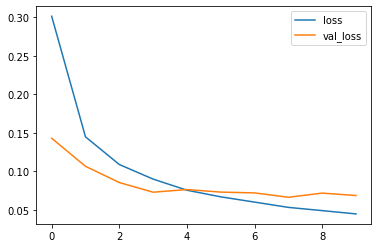

In [ ]:
# Plot the loss per iteration.

plt.plot(fitted_model.history['loss'],label='loss')
plt.plot(fitted_model.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

# If we increase number of epochs, it may overfit on the testing data (val_loss).

** Evaluate the Model **

In [ ]:
model.evaluate(x_test,y_test) # In terms of loss and accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.9794


[0.06852497905492783, 0.9793999791145325]

** Start the Predictions journey **

In [ ]:
model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


array([[1.5041066e-09, 6.3853087e-09, 3.1082692e-08, ..., 9.9999481e-01,
        7.5750478e-10, 3.1144600e-07],
       [1.2078472e-12, 7.8066790e-07, 9.9999911e-01, ..., 5.6508001e-19,
        8.0204865e-09, 1.9975239e-16],
       [1.5970656e-08, 9.9958986e-01, 9.0991507e-06, ..., 4.9130893e-05,
        3.2700482e-04, 2.6961229e-07],
       ...,
       [1.6995181e-15, 1.6990087e-12, 8.0777283e-14, ..., 3.8267025e-08,
        3.4777501e-09, 1.1191394e-06],
       [4.1935957e-10, 4.2653238e-15, 4.9570006e-17, ..., 1.7098440e-15,
        3.1908632e-05, 6.6857162e-15],
       [7.1199635e-10, 1.0613656e-12, 2.8947431e-08, ..., 1.0498240e-14,
        2.4019944e-10, 3.5603416e-13]], dtype=float32)

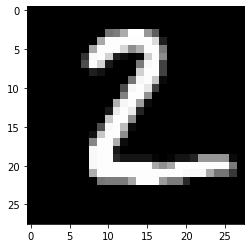

In [ ]:
plt.imshow(x_test[1], cmap='gray')
plt.show()

In [ ]:
y_test[1]

2

In [ ]:
model.predict(x_test).shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

In [ ]:
model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
pred_test = model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
confusion_matrix = confusion_matrix(y_test,pred_test)
confusion_matrix

array([[ 969,    1,    1,    0,    0,    2,    5,    1,    1,    0],
       [   0, 1127,    2,    1,    0,    0,    2,    0,    3,    0],
       [   0,    3, 1010,    1,    5,    0,    2,    4,    7,    0],
       [   0,    0,    4,  984,    0,    6,    0,    5,    5,    6],
       [   1,    0,    2,    0,  962,    0,    7,    1,    0,    9],
       [   1,    0,    0,    8,    1,  869,    4,    1,    5,    3],
       [   4,    3,    0,    1,    2,    2,  944,    0,    2,    0],
       [   3,    5,   13,    2,    0,    0,    0,  996,    2,    7],
       [   5,    0,    3,    3,    3,    3,    1,    3,  950,    3],
       [   6,    3,    0,    4,    7,    2,    1,    3,    0,  983]])

Confusion matrix, without normalization
[[ 969    1    1    0    0    2    5    1    1    0]
 [   0 1127    2    1    0    0    2    0    3    0]
 [   0    3 1010    1    5    0    2    4    7    0]
 [   0    0    4  984    0    6    0    5    5    6]
 [   1    0    2    0  962    0    7    1    0    9]
 [   1    0    0    8    1  869    4    1    5    3]
 [   4    3    0    1    2    2  944    0    2    0]
 [   3    5   13    2    0    0    0  996    2    7]
 [   5    0    3    3    3    3    1    3  950    3]
 [   6    3    0    4    7    2    1    3    0  983]]


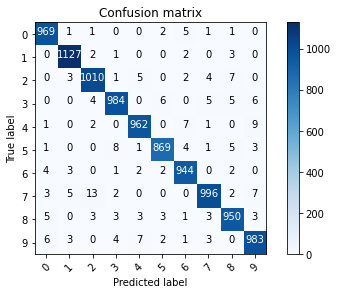

In [ ]:
# Plot confusion matrix
# Kindly dont focus on the details of implementation of the code below
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


cm = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

In [ ]:
# Confusion Matrix:
# It provides info between True values and predicted values. We need to ignore diagonal line.
# Each number from the matric represents the mismatchbetween the Actual value and predicted value.
# Here the highest number is 13. It means 7 is wrongly predicted as 2 by 13 times.

# Show Missclassified data

In [ ]:
misclassified_idx = np.where(pred_test != y_test)[0] # It is a tuple, the actual values are present at index 0.

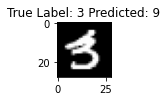

In [ ]:
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(1,1))
plt.imshow(x_test[i],cmap='gray')
plt.title('True Label: %s Predicted: %s'%(y_test[i],pred_test[i]))
plt.show()

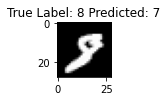

In [ ]:
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(1,1))
plt.imshow(x_test[i],cmap='gray')
plt.title('True Label: %s Predicted: %s'%(y_test[i],pred_test[i]))
plt.show()

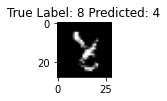

In [ ]:
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(1,1))
plt.imshow(x_test[i],cmap='gray')
plt.title('True Label: %s Predicted: %s'%(y_test[i],pred_test[i]))
plt.show()

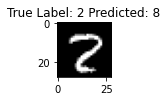

In [ ]:
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(1,1))
plt.imshow(x_test[i],cmap='gray')
plt.title('True Label: %s Predicted: %s'%(y_test[i],pred_test[i]))
plt.show()

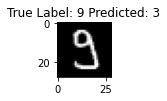

In [ ]:
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(1,1))
plt.imshow(x_test[i],cmap='gray')
plt.title('True Label: %s Predicted: %s'%(y_test[i],pred_test[i]))
plt.show()

In [ ]:
# Check how many misclassified matched are there
len(misclassified_idx)

# There are 206 mismatched. If we accumulate above confusion matrix, we get the same 206 mismatches

206